In [1]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import Sequential
import numpy as np 
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [2]:
dataset = tf.keras.datasets.mnist

In [3]:
dataset

<module 'keras.datasets.mnist' from '/Users/manniartivor/anaconda3/lib/python3.10/site-packages/keras/datasets/mnist/__init__.py'>

In [4]:
(x_train, y_train), (x_test, y_test) = dataset.load_data()

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [8]:
# Make sure images have shape (28, 28, 1)
x_train_scaled = x_train_scaled.reshape(len(x_train_scaled), 28, 28, 1)
x_test_scaled = x_test_scaled.reshape(len(x_test_scaled), 28, 28, 1)

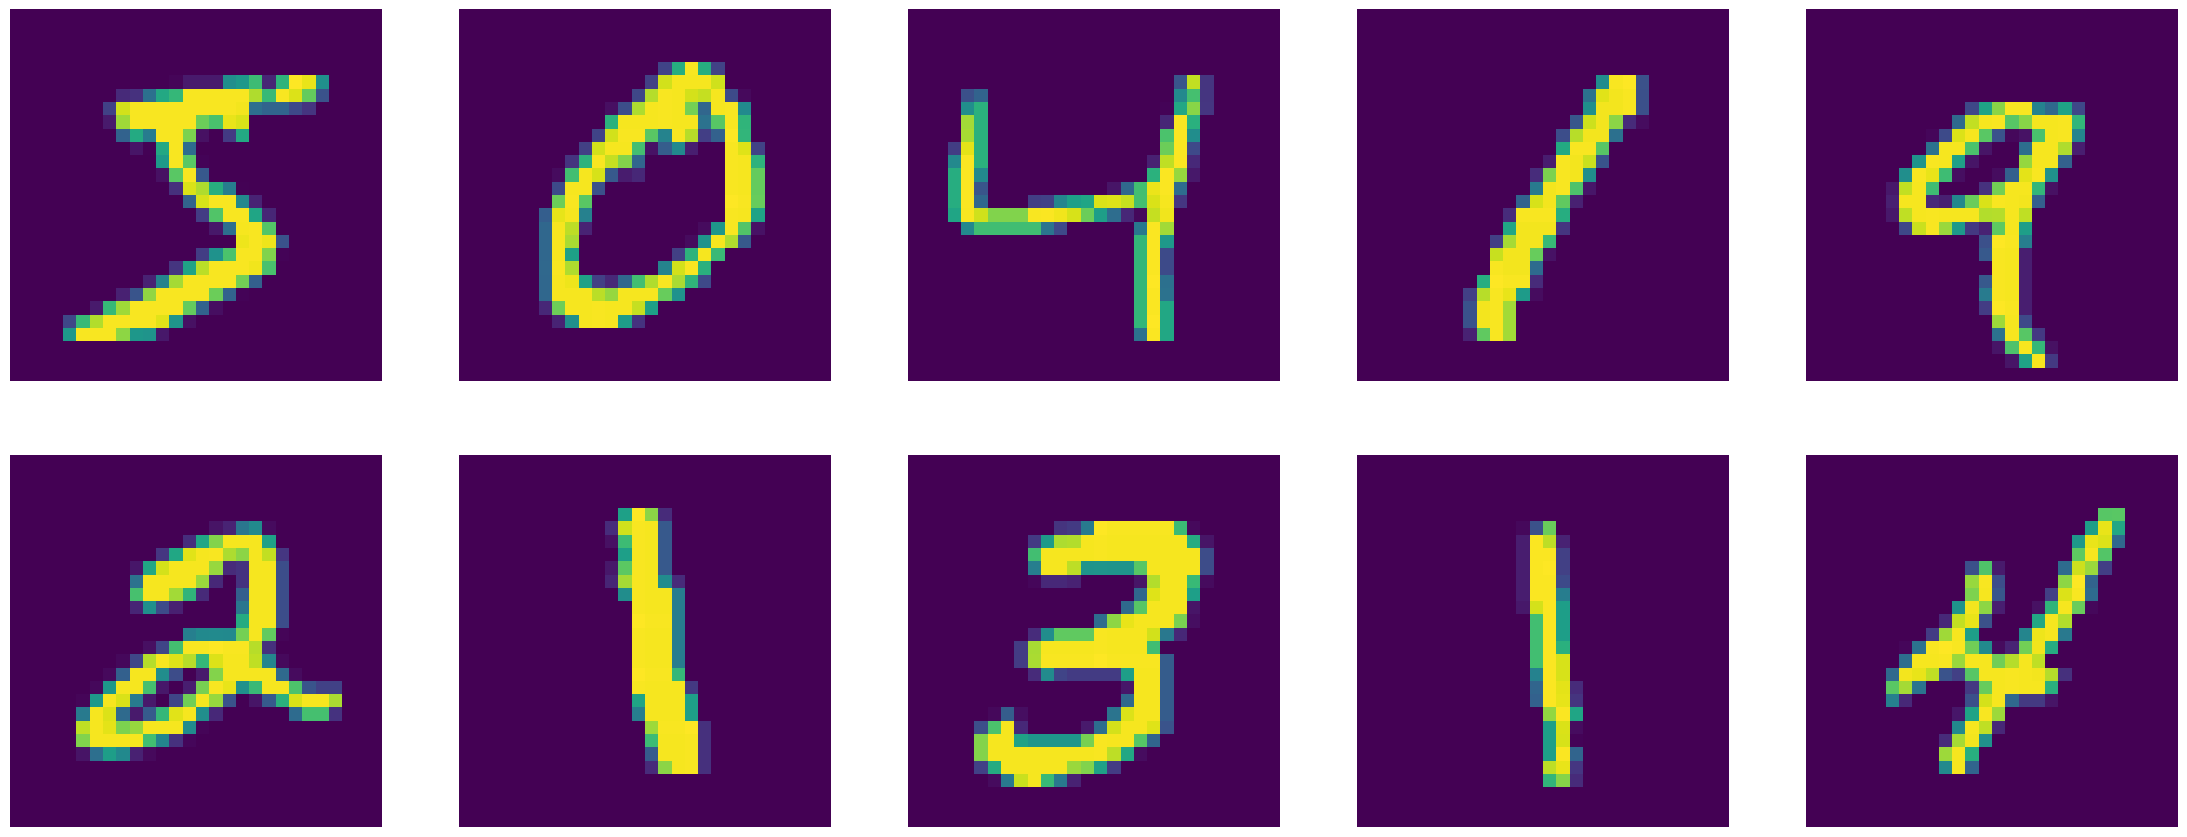

In [9]:
plt.figure(figsize=(28, 28))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train_scaled[i])
    plt.axis('off')
plt.show()

In [19]:
# Define the Sequential model and params
model = tf.keras.models.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# fit the model 
model.fit (x_train_scaled, y_train, epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.8963 - loss: 0.3361
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9852 - loss: 0.0475
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9889 - loss: 0.0344
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9917 - loss: 0.0250
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9940 - loss: 0.0186
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.9945 - loss: 0.0158
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9965 - loss: 0.0122
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9966 - loss: 0.0099
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9974 - loss: 0.0091
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9975 - loss: 0.0074


In [21]:
test_acc = model.evaluate(x_test,y_test, verbose=2)
print('\n Loss & Test accuracy:', test_acc)

313/313 - 1s - 4ms/step - accuracy: 0.9888 - loss: 8.7530

 Loss & Test accuracy: [8.752964973449707, 0.9887999892234802]
